<a href="https://colab.research.google.com/github/akifkashif/Captsone-Project---Data-Application-Energy-Linear-Regression-/blob/main/Ultimate_True_Captsone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
from numpy import math
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import warnings
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px  
from datetime import datetime 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import accuracy_score, auc
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


In [ ]:
# Importing Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset which is in csv.
df = pd.read_csv('/content/drive/MyDrive/data_application_energy.csv',parse_dates=['date'])

In [ ]:
#Visualizing the dataset
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
#Checking the names of all columns of the dataset
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
#Checking the datatype of the column values and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
#Checking the description of the dataset
df.describe(include  = 'all')

<ipython-input-8-cadd0bb34135>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889


In [ ]:
#The shape of the dataset i.e, number of rows and columns
df.shape

(19735, 29)

In [ ]:
#Checking whether the date column is in datatime format or not
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#Extracting the months, hours and weeks from the date column by setting it as index
df = df.set_index('date')
df['month'] = df.index.month
df['hour'] = df.index.hour
df['week'] = df.index.week

<ipython-input-10-c361a99acd60>:4: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:
# Resetting the index and the date returns back to being a column
df.reset_index(inplace = True)

In [ ]:
# Calculate average energy load per hour
def code_mean(data, cat_feature, real_feature):
    """
    Returns a dictionary where keys are unique categories of the cat_feature,
    and values are means over real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [ ]:
df['hour_avg'] = list(map(
    code_mean(df[:], 'hour', "Appliances").get, df.hour))

In [ ]:

df['low_consum'] = (df.Appliances+25<(df.hour_avg))*1
df['high_consum'] = (df.Appliances+100>(df.hour_avg))*1

***We assume that we have low(high) energy load when the appliances consumption is lower(higher) than a given point of the hourly average counsumption. This point is dependent of data time frequency and the numbers below are set after several tryouts based on appliances' consumption standard deviation.***

In [ ]:
# Finding out how many unique months are there
df['month'].unique()

array([1, 2, 3, 4, 5])

# The data has been collected from months January to May

In [ ]:
#Extracting the year from the date column
year = []
for i in range(len(df['date'])):
  year.append(df['date'][i].year)
df['year'] = year  

In [ ]:
#Checking if there are null values or not and their sum for each column
df.isna().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
month          0
hour           0
week           0
hour_avg       0
low_consum     0
high_consum    0
year           0
dtype: int64

In [ ]:
#Making a copy of the original dataset for futhur analysis
df1 = df.copy()

In [ ]:
#COnverting month number to month name
import calendar
df1['month'] = df1['month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df1['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May'], dtype=object)

# This result shows there are no null values 

In [ ]:
#Creating a dataframe with respect to the month column's sum
df_month = df1.groupby('month').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6791682be0>],
      dtype=object)

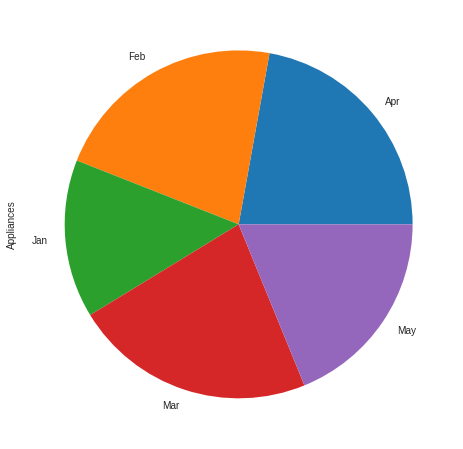

In [ ]:
# Pie chart of dataframe of month versus Appliances column
df_month['Appliances'].plot(kind='pie', subplots=True, figsize=(8, 8))

# From this Pie chart we can observe that in Feb, Mar, April, the usage of appliances is more or less equal and that of Jan was the lowest one

In [ ]:
#Checking if all the hours of a day are considered or not
df1['hour'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16])

In [ ]:
#Creating another dataframe with respect to the hour column's sum
df_hourly = df1.groupby('hour').sum()['Appliances']

In [ ]:
df_hourly.head()

hour
0    43390
1    42190
2    40340
3    39650
4    40570
Name: Appliances, dtype: int64

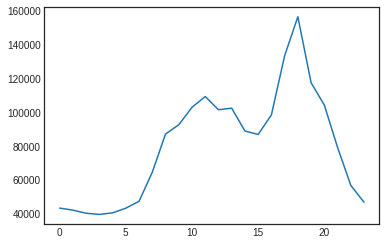

In [ ]:
# Line plot of hour vs Appliances(hour is on X-axis)
plt.plot(df_hourly)
plt.show()


# From this line plot, the usage of appliances is a steady rise starting from 12 am and hits peak aroud 18th hour of the day. Then, after hitting its peak it takes a sudden dip starting from 21ist hour. The underlying reason might be because its night time and people probably will be less active.

In [ ]:
#Checking the unique values of the week column
df1['week'].unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])

***The data has been collected for 20 weeks starting from Jan 1 to May 27.***

In [ ]:
##Creating another dataframe with respect to the week column's sum
df_weekly = df.groupby('week').sum()['Appliances']

In [ ]:
df_weekly.head()

week
2    110490
3     96960
4     76060
5     99680
6    114070
Name: Appliances, dtype: int64

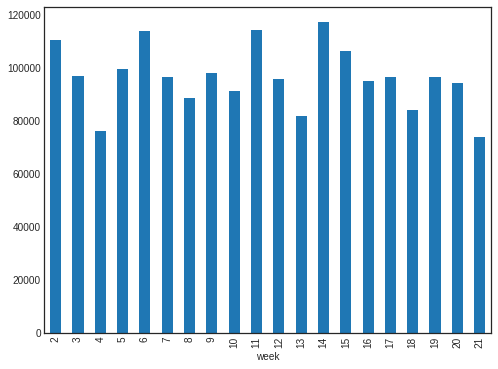

In [ ]:
#Bar plot which shows the usage of appliances in a week
fig, ax = plt.subplots(figsize=(8,6))
df_weekly.plot(kind='bar', ax=ax)

# This bar plot shows that at week 14 i.e, the second week of April, the usage of appliances is the highest and on the other hand, its lowest in the last week of the period i.e, the fourth week of May.

In [ ]:
df['year'].unique()

array([2016])

# This data collection was collected in the year 2016

The number of the 0,1% top values of appliances' load is 19 and they have power load higher than 140 Wh.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



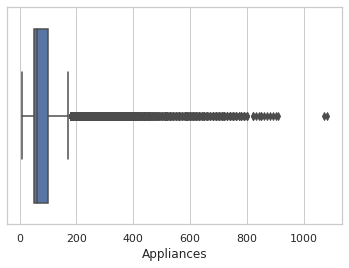

In [ ]:

# Find outliers
sorted_appliances = df1.sort_values('Appliances',ascending=False)
print("The number of the 0,1% top values of appliances' load is",
      len(sorted_appliances.head(len(sorted_appliances)//1000)),"and they have power load higher than",
      sorted_appliances.Appliances[19], "Wh.")

# boxplot appliances
sns.set(style="whitegrid")
ax = sns.boxplot(sorted_appliances.Appliances)

In [ ]:

# Outliers removal

df1 = df.dropna()
df1 = df.drop(df[(df.Appliances>140)|(df.Appliances<0)].index)

***As we can see, there are no missing values in the dataset***

In [ ]:
df2 = df1.copy()

In [ ]:
# Dropping the month, week,year column as we are done with EDA
df2.drop(columns = (['month', 'week', 'year']), inplace = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17293 entries, 0 to 19731
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17293 non-null  datetime64[ns]
 1   Appliances   17293 non-null  int64         
 2   lights       17293 non-null  int64         
 3   T1           17293 non-null  float64       
 4   RH_1         17293 non-null  float64       
 5   T2           17293 non-null  float64       
 6   RH_2         17293 non-null  float64       
 7   T3           17293 non-null  float64       
 8   RH_3         17293 non-null  float64       
 9   T4           17293 non-null  float64       
 10  RH_4         17293 non-null  float64       
 11  T5           17293 non-null  float64       
 12  RH_5         17293 non-null  float64       
 13  T6           17293 non-null  float64       
 14  RH_6         17293 non-null  float64       
 15  T7           17293 non-null  float64       
 16  RH_7

***All columns are of desirable data type***

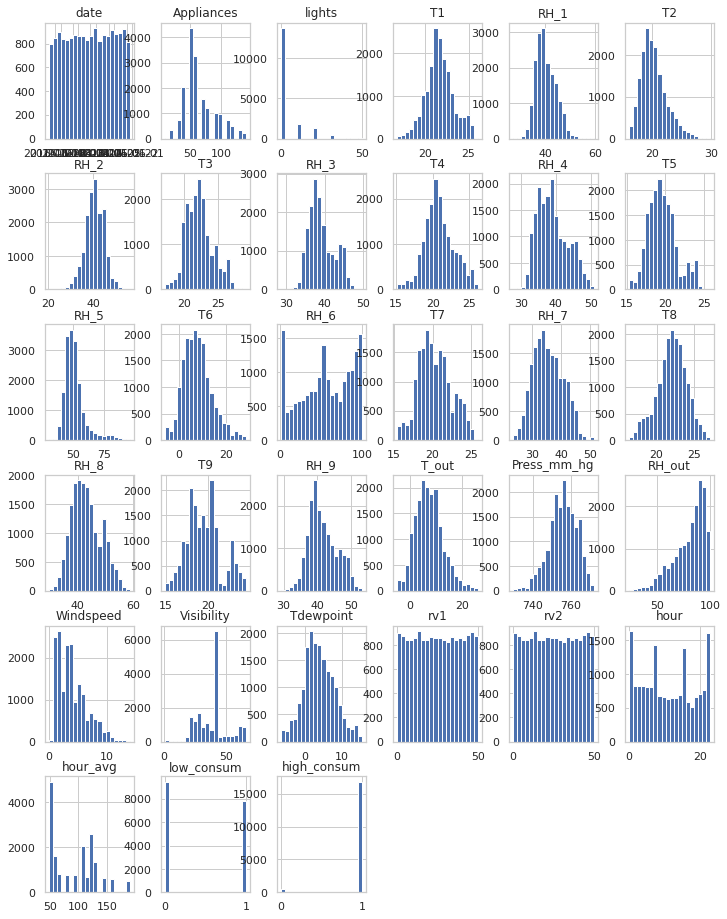

In [ ]:
# Histogram of all the features to understand the distribution
df2.hist(bins = 20 , figsize= (12,16)) ;


<ipython-input-42-c7d6156408e6>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-42-c7d6156408e6>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-42-c7d6156408e6>:5: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

<ipython-input-42-c7d6156408e6>:5: RuntimeWarning:

More than 20 figures have been

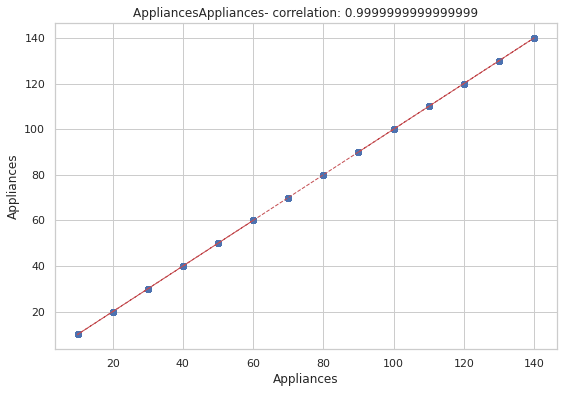

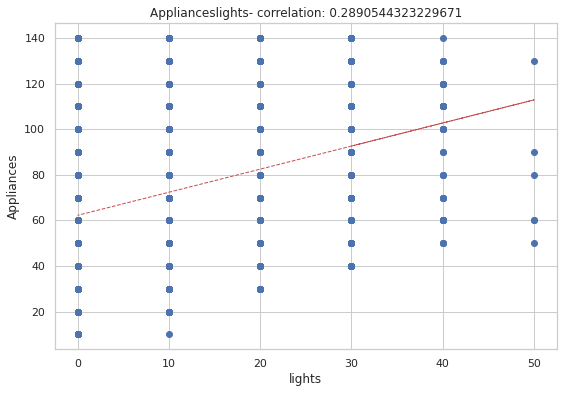

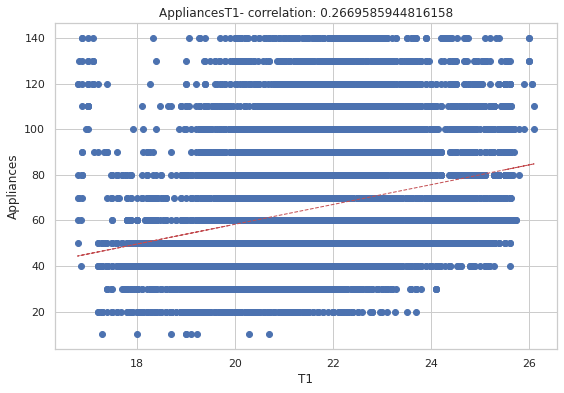

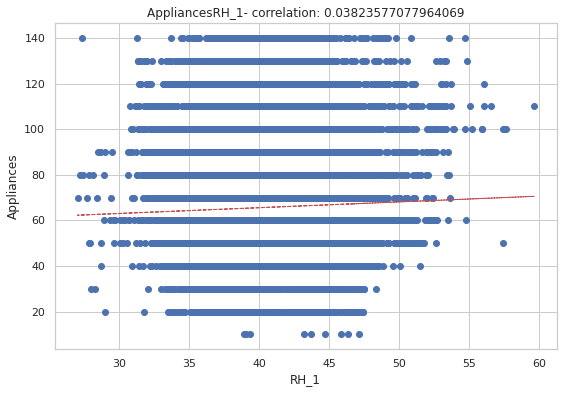

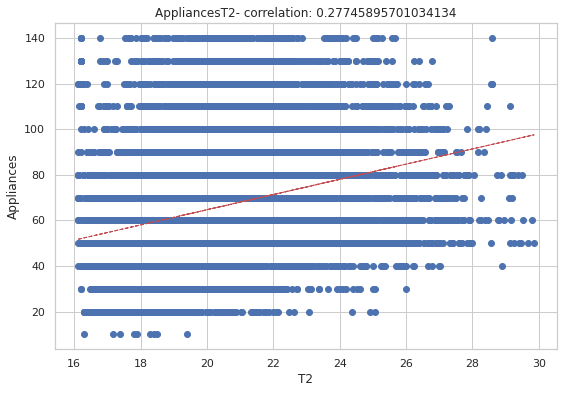

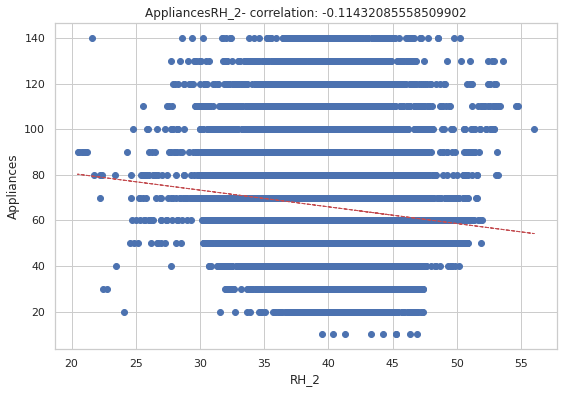

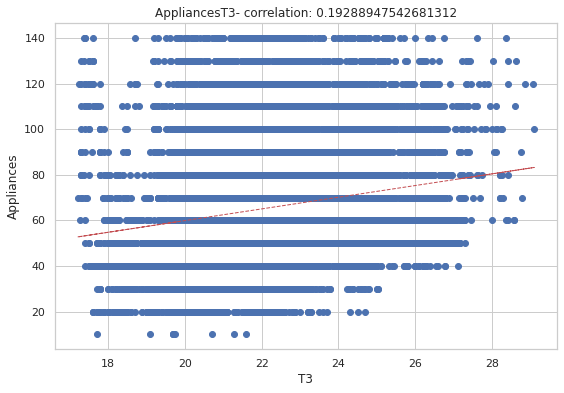

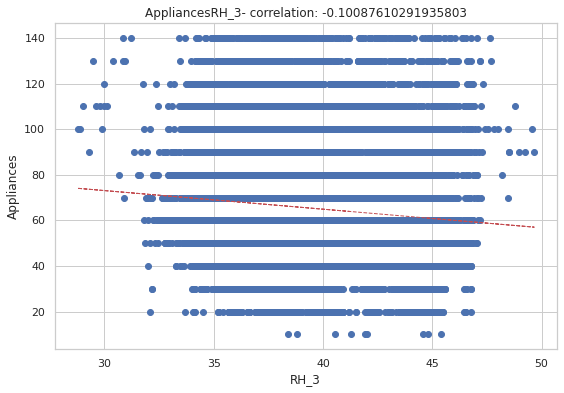

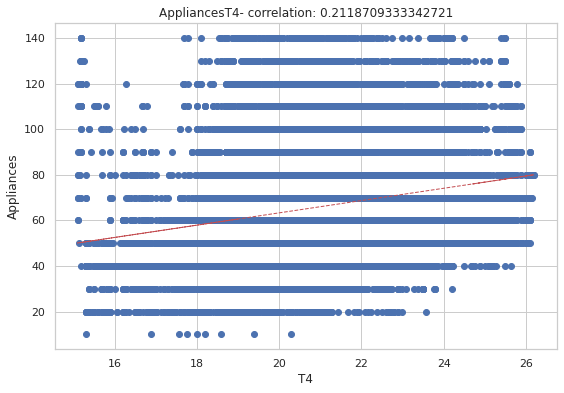

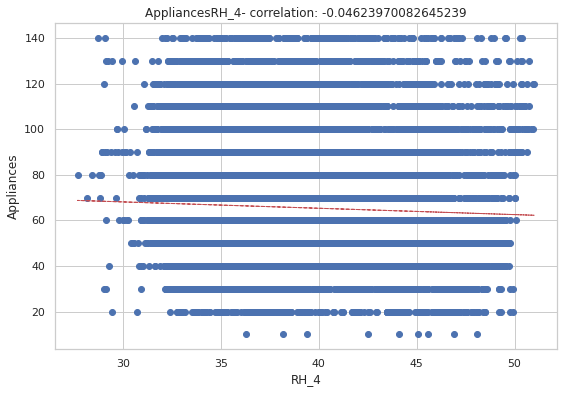

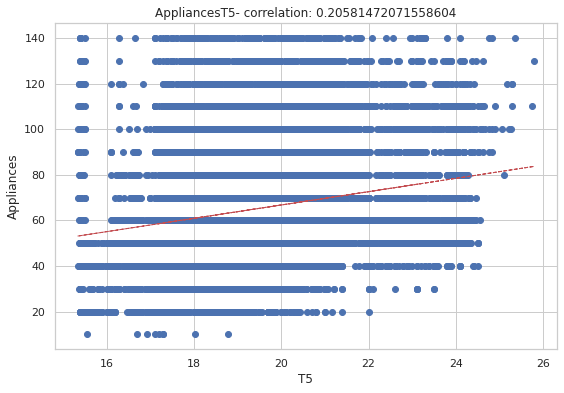

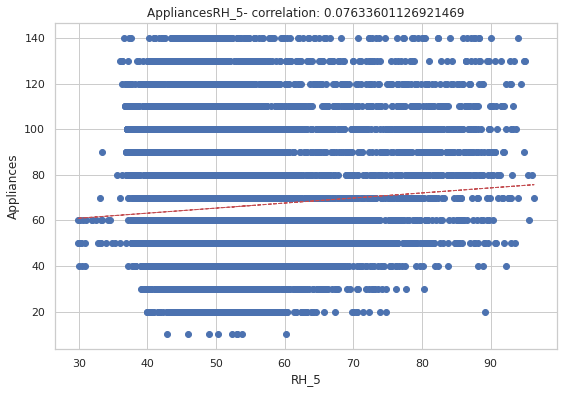

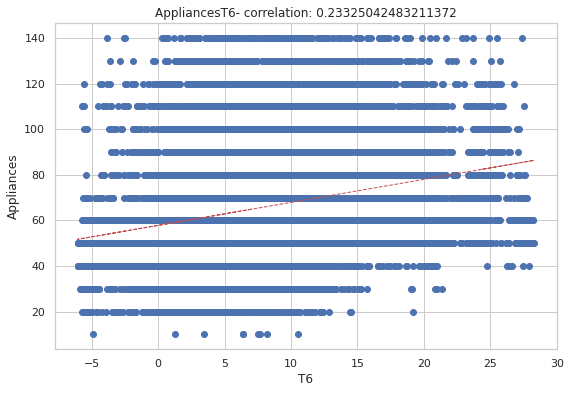

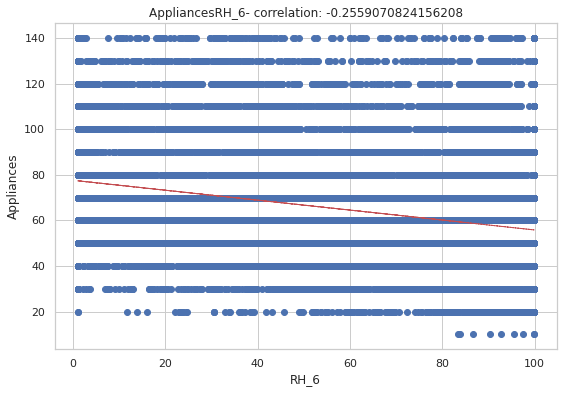

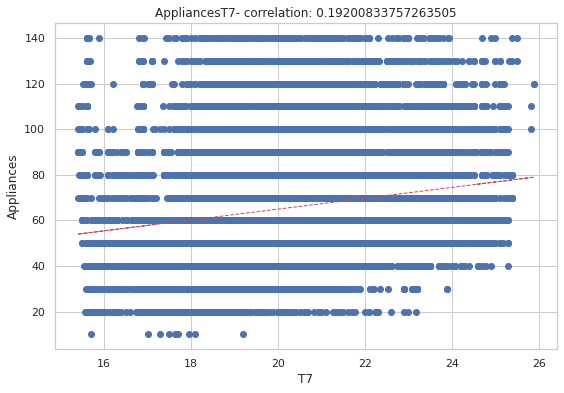

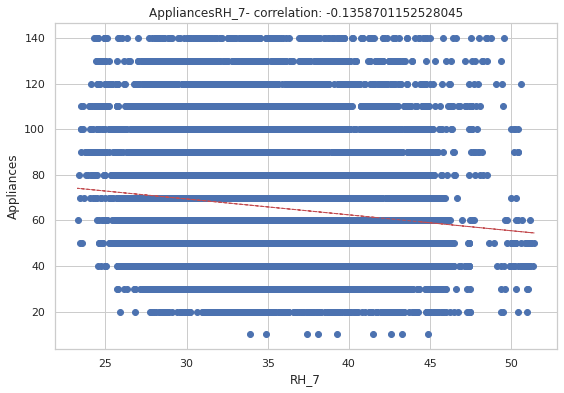

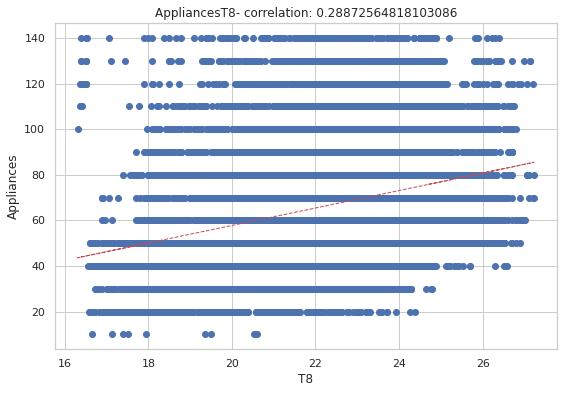

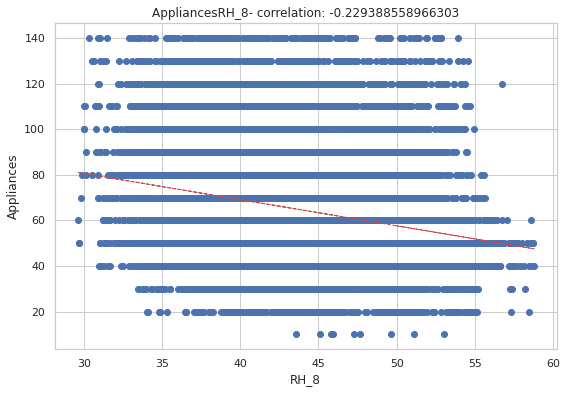

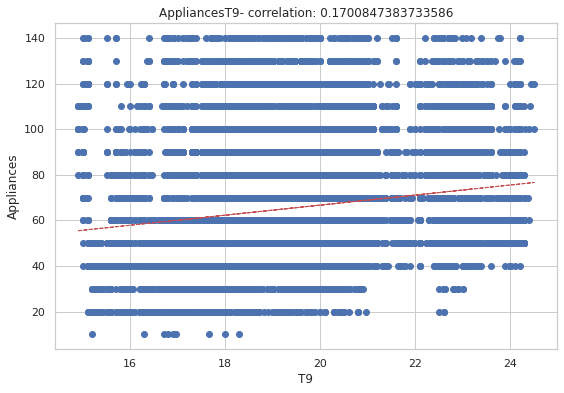

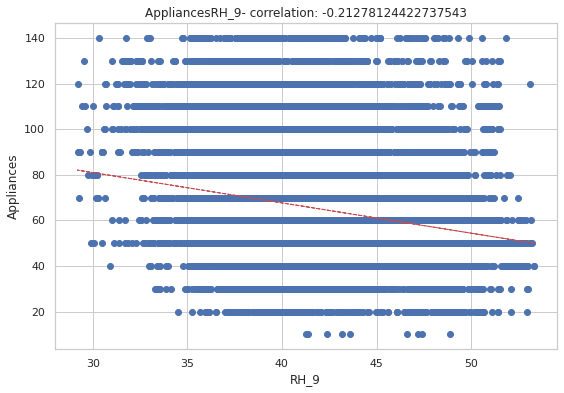

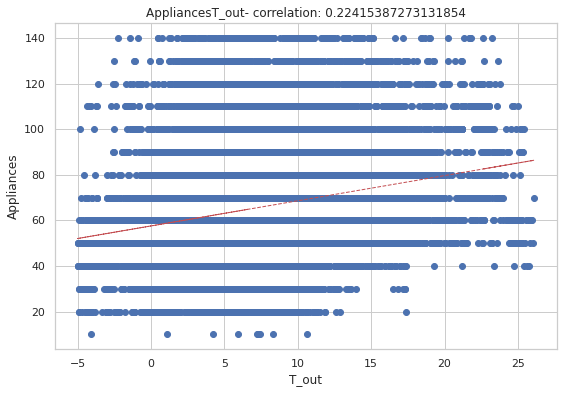

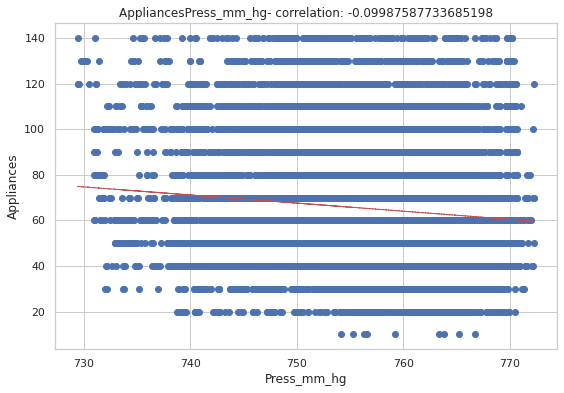

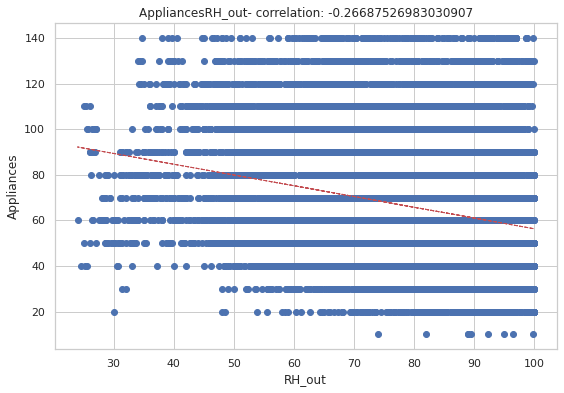

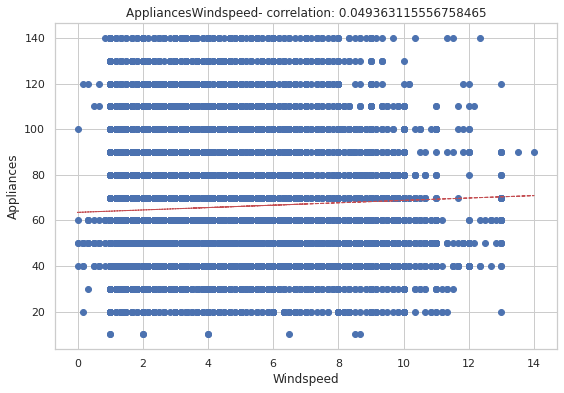

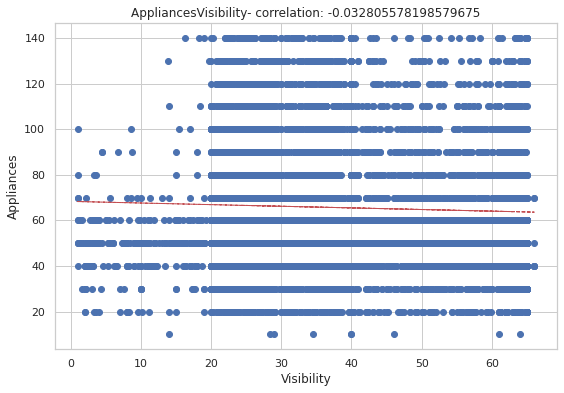

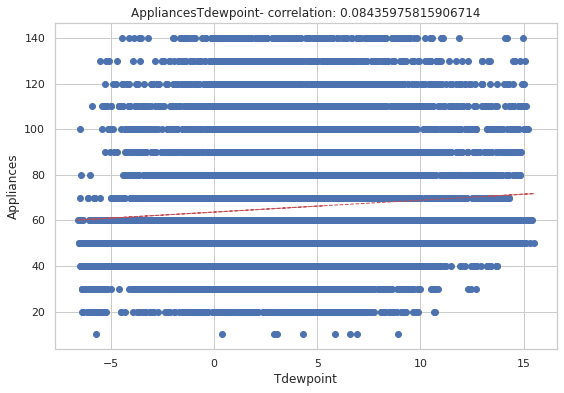

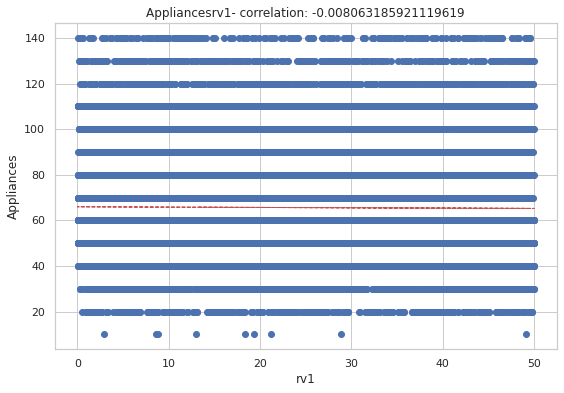

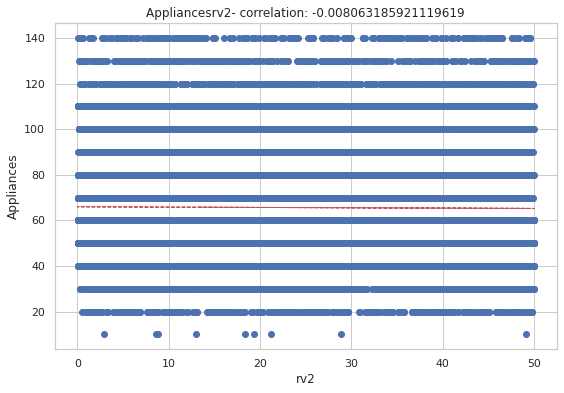

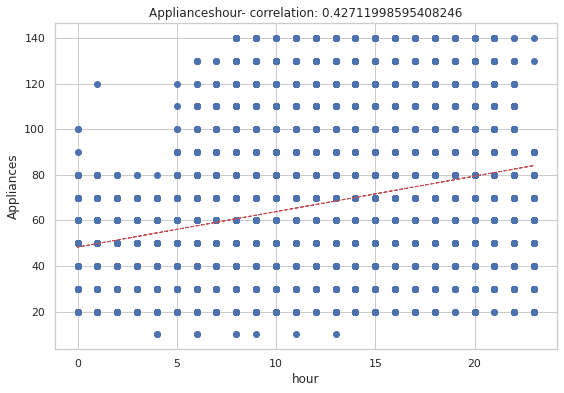

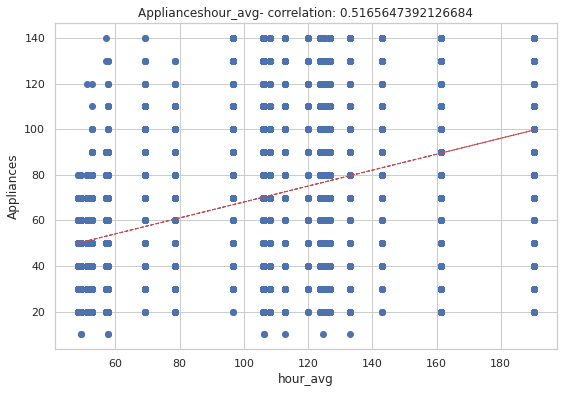

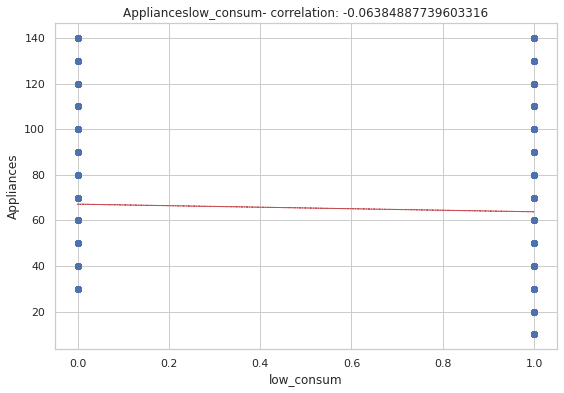

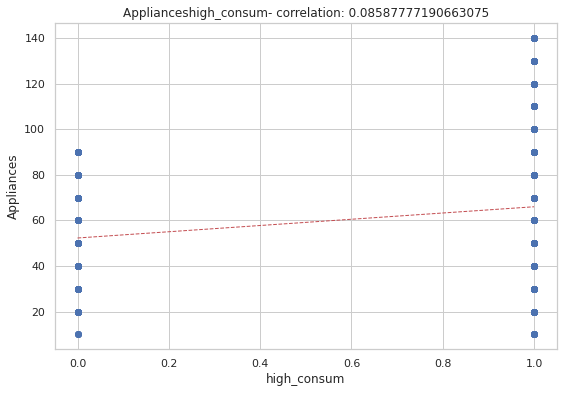

In [ ]:

# obtaining correlation plots between dependent and independent variables

numeric_features = df2.columns
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df2[col]
    label = df2['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df2[col], df2['Appliances'], 1)
    y_hat = np.poly1d(z)(df2[col])

    plt.plot(df2[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning:

divide by zero encountered in double_scalars



,variables,VIF
0,lights,1.582724
1,T1,3957.394164
2,RH_1,2208.460305
3,T2,2701.704118
4,RH_2,2496.829571
5,T3,1535.525240
6,RH_3,1945.043971
7,T4,1083.049385
8,RH_4,1491.020057
9,T5,1233.585127


In [ ]:
df2.drop(columns=['rv2'],axis=1,inplace=True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.582724
1,T1,3957.394164
2,RH_1,2208.460305
3,T2,2701.704118
4,RH_2,2496.829571
5,T3,1535.525240
6,RH_3,1945.043971
7,T4,1083.049385
8,RH_4,1491.020057
9,T5,1233.585127


In [ ]:
df2.drop(columns=['T1'],axis=1,inplace=True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.582462
1,RH_1,1711.131576
2,T2,1604.256132
3,RH_2,2011.853396
4,T3,1303.880944
5,RH_3,1944.810640
6,T4,1048.991817
7,RH_4,1490.591340
8,T5,1214.376019
9,RH_5,46.921428


In [ ]:
df2.drop(columns=['T9'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.551207
1,RH_1,1709.381474
2,T2,1601.484742
3,RH_2,1989.613999
4,T3,1238.943483
5,RH_3,1933.960514
6,T4,1027.556059
7,RH_4,1490.510006
8,T5,1099.734192
9,RH_5,46.594616


In [ ]:
df2.drop(columns=['Press_mm_hg'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.543344
1,RH_1,1668.209338
2,T2,1583.203862
3,RH_2,1902.697747
4,T3,1237.419894
5,RH_3,1914.941133
6,T4,1009.722151
7,RH_4,1480.356806
8,T5,1064.509044
9,RH_5,46.558121


In [ ]:
df2.drop(columns=['RH_2', 'T2','RH_1', 'RH_4', 'RH_3','T7','T5'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.475054
1,T3,947.155321
2,T4,606.683432
3,RH_5,43.418424
4,T6,69.449269
5,RH_6,34.621167
6,RH_7,367.497273
7,T8,566.924198
8,RH_8,489.751645
9,RH_9,514.526479


In [ ]:
df2.drop(columns=['T3', 'T4','RH_7', 'RH_8', 'RH_9','RH_out', 'T_out'],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date']]])

,variables,VIF
0,lights,1.376389
1,RH_5,37.809619
2,T6,19.865752
3,RH_6,12.354473
4,T8,76.258302
5,Windspeed,4.350704
6,Visibility,11.216593
7,Tdewpoint,7.355602
8,rv1,3.952312
9,hour,5.387420


In [ ]:
df2.drop(columns=['RH_5', 'T6', 'T8',],axis=1,inplace=True)
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.353565
1,RH_6,4.707178
2,Windspeed,3.920099
3,Visibility,10.056943
4,Tdewpoint,1.950927
5,rv1,3.834941
6,hour,5.248124
7,hour_avg,14.846828
8,low_consum,3.436753
9,high_consum,14.193800


In [ ]:
df2[df2.columns[:]].corr()['Appliances'][:]

Appliances     1.000000
lights         0.289054
RH_6          -0.255907
Windspeed      0.049363
Visibility    -0.032806
Tdewpoint      0.084360
rv1           -0.008063
hour           0.427120
hour_avg       0.516565
low_consum    -0.063849
high_consum    0.085878
Name: Appliances, dtype: float64

In [ ]:
df2.drop(columns = (['hour_avg']), inplace =  True)


In [ ]:
df2.drop(columns = (['date']), inplace =  True)

In [ ]:
calc_vif(df2[[i for i in df2.describe().columns if i not in ['Appliances','date' ]]])

,variables,VIF
0,lights,1.338248
1,RH_6,4.687564
2,Windspeed,3.813718
3,Visibility,9.652418
4,Tdewpoint,1.946860
5,rv1,3.796794
6,hour,3.993686
7,low_consum,2.066587
8,high_consum,13.623267


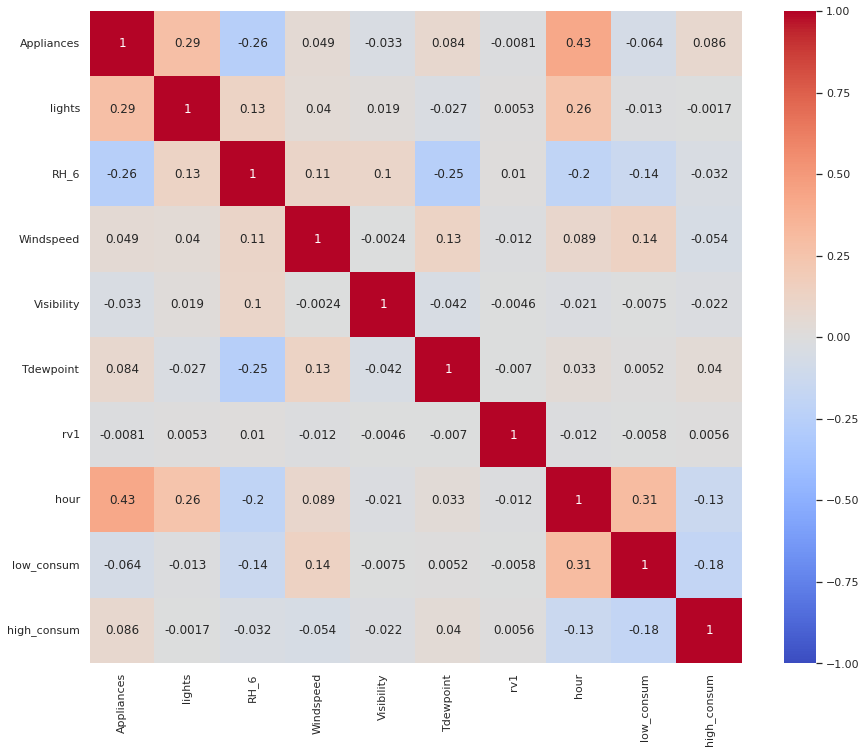

In [ ]:
#Heatmap after reducing the multicollenearity 
plt.figure(figsize=(15,12))
sns.heatmap(df2.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [ ]:
# Creating the data of independent variables
Y = df2['Appliances']

# Create the dependent variable data
X = df2.drop(columns=['Appliances'],axis=1).values

In [ ]:
X

array([[30.        , 84.25666667,  7.        , ..., 17.        ,
         1.        ,  0.        ],
       [30.        , 84.06333333,  6.66666667, ..., 17.        ,
         1.        ,  0.        ],
       [30.        , 83.15666667,  6.33333333, ..., 17.        ,
         1.        ,  0.        ],
       ...,
       [ 0.        ,  1.        ,  3.16666667, ..., 17.        ,
         1.        ,  1.        ],
       [ 0.        ,  1.        ,  3.33333333, ..., 17.        ,
         1.        ,  1.        ],
       [ 0.        ,  1.        ,  3.5       , ..., 17.        ,
         1.        ,  1.        ]])

In [ ]:

# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:

# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [ ]:

# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

In [ ]:

# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

In [ ]:

# r2 score of train set

r2_linear_train = r2_score(Y_train, Y_pred_train)

In [ ]:

r2_linear_train

0.3136984309565769

In [ ]:

r2_linear_test = r2_score(Y_test, Y_pred_test)

In [ ]:
r2_linear_test

0.32240926276747084

In [ ]:

# different metrics used

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 441.51565862089655
RMSE : 21.012273999281863
R2 : 0.32240926276747084
Adjusted R2 :  0.32064112225280206


In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.001, max_iter=3000)

In [ ]:
lasso =  lasso.score(X_train, Y_train)

In [ ]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.217e+05, tolerance: 7.607e+02

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.904e+05, tolerance: 7.568e+02

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.323e+05, tolerance: 7.597e+02

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -470.6771129175243


In [ ]:

lasso  = Lasso(alpha=0.01 , max_iter= 3000)

lasso.fit(X_train, Y_train)

Lasso(alpha=0.01, max_iter=3000)

In [ ]:
Lasso =lasso.score(X_train, Y_train)

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -470.72376960028106


In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge(alpha=1 , max_iter= 3000)

ridge.fit(X_train, Y_train)

Ridge(alpha=1, max_iter=3000)

In [ ]:
ridge = ridge.score(X_train, Y_train)

In [ ]:
# training model

from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [ ]:

# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")


The best Decision Tree R2 score is 0.7347650045935742 with max depth 8


The best R2 test score is : 0.7334554723778516 with max depth = 8


In [ ]:
# training model

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [10,15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)


In [ ]:

# getting best parameters

print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")



The best Random Forest R2 train score is : 0.7910833331079438 with n estimators = 17, max depth : 20, min samples split : 4 and min samples leaf : 2


The best Random Forest R2 test score is : 0.7914337122686352 with n estimators = 17, max depth : 20, min samples split : 4 and min samples leaf : 2


In [ ]:
# training model

from sklearn.ensemble import ExtraTreesRegressor
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [50,80,100],
         'min_samples_split':[1,4,8],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train,Y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test,Y_test)
r2_extratree_test = best_ExtrasTrees.score(X_test,Y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.p

In [ ]:

# getting best parameters

print(f"The best Extra Trees R2 score is : {gridSearch_ExtraTrees.best_score_} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Extra Trees R2 test score is : {bestExtrasTrees_testScore} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")


     

The best Extra Trees R2 score is : 0.7951614766241798 with n estimators = 20, max depth : 80, min samples split : 8 and min samples leaf : 1


The best Extra Trees R2 test score is : 0.7986211263524876 with n estimators = 20, max depth : 80, min samples split : 8 and min samples leaf : 1


In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,
         Y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
r2_XGBoost_test = xgb_grid.best_score_


Fitting 2 folds for each of 9 candidates, totalling 18 fits
0.7678743399927846
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [ ]:

# creating a list of all model names
model_list = ['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regressor','Random Forest Regressor','Extra Trees Regressor', 'XGBoost Regressor']


In [ ]:

# creating a list of all model r2 score results from above

result_list = [r2_linear_test,Lasso,ridge,r2_decision_test,r2_randomforest_test,r2_extratree_test, r2_XGBoost_test]


In [ ]:

# creating an empty dataframe

results_df = pd.DataFrame()



In [ ]:

# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list



In [ ]:
# dataframe containing results from all the above models used

results_df


,model name,R2-score
0,Linear Regression,0.322409
1,Lasso Regression,0.313676
2,Ridge Regression,0.313698
3,Decision Tree Regressor,0.733455
4,Random Forest Regressor,0.791434
5,Extra Trees Regressor,0.798621
6,XGBoost Regressor,0.767874


# Conclusion

1.From the above results dataframe, the Extra Tres Regressor model is the best model for this dataset.

2.Decision Tree Regressor had an accuracy of less than 73% which is not desirable

3.Ridge and lasso Regression performed very poorly

4.We have extracted sensible and appropriate information using Exploratory Data Analysis